### Importing the Library for GUI

In [ ]:
!pip install flask-ngrok

### Importing the Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # for visualization

### Importing the Final Dataset

In [ ]:
dataset = pd.read_csv("5.urldata.csv")
dataset.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


### Some Analysis of Dataset

In [ ]:
print(dataset.shape)
print(dataset.columns)
print(dataset.info())

(10000, 18)
Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Web_Traffic    10000 non-null  int64 
 11  Domain_Age     10000 non-n

#### Feature's Histogram

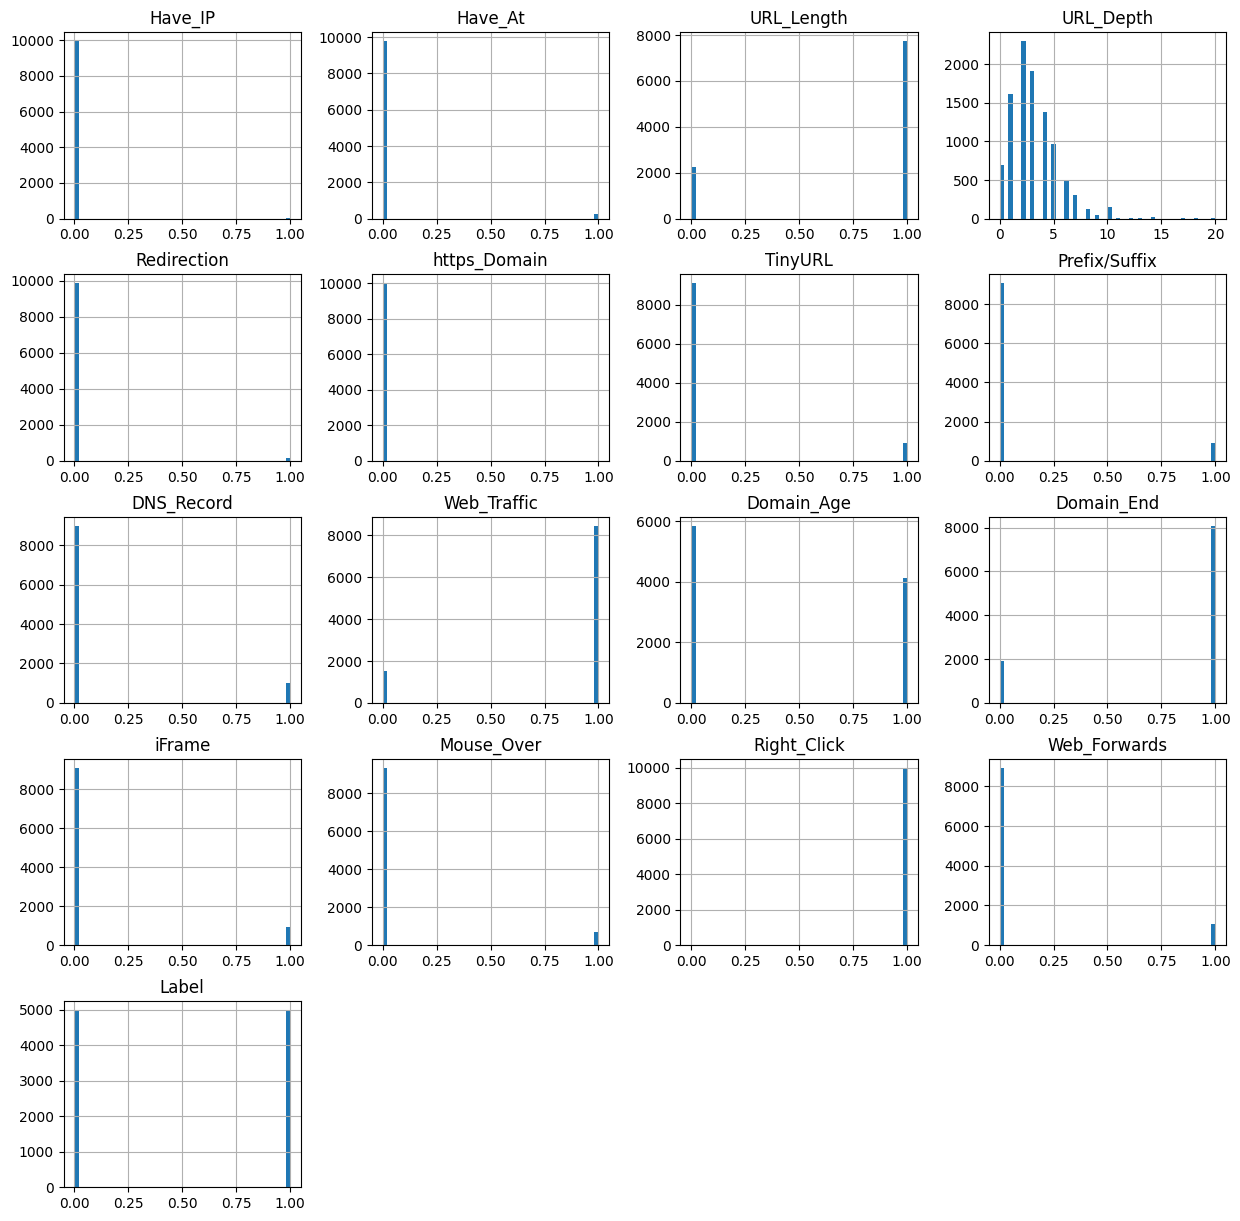

In [ ]:
dataset.hist(bins=50,figsize=(15,15))
plt.show()
# 1 -> Phished one
# 0 -> Legitimate one

#### Correlation b/w Features

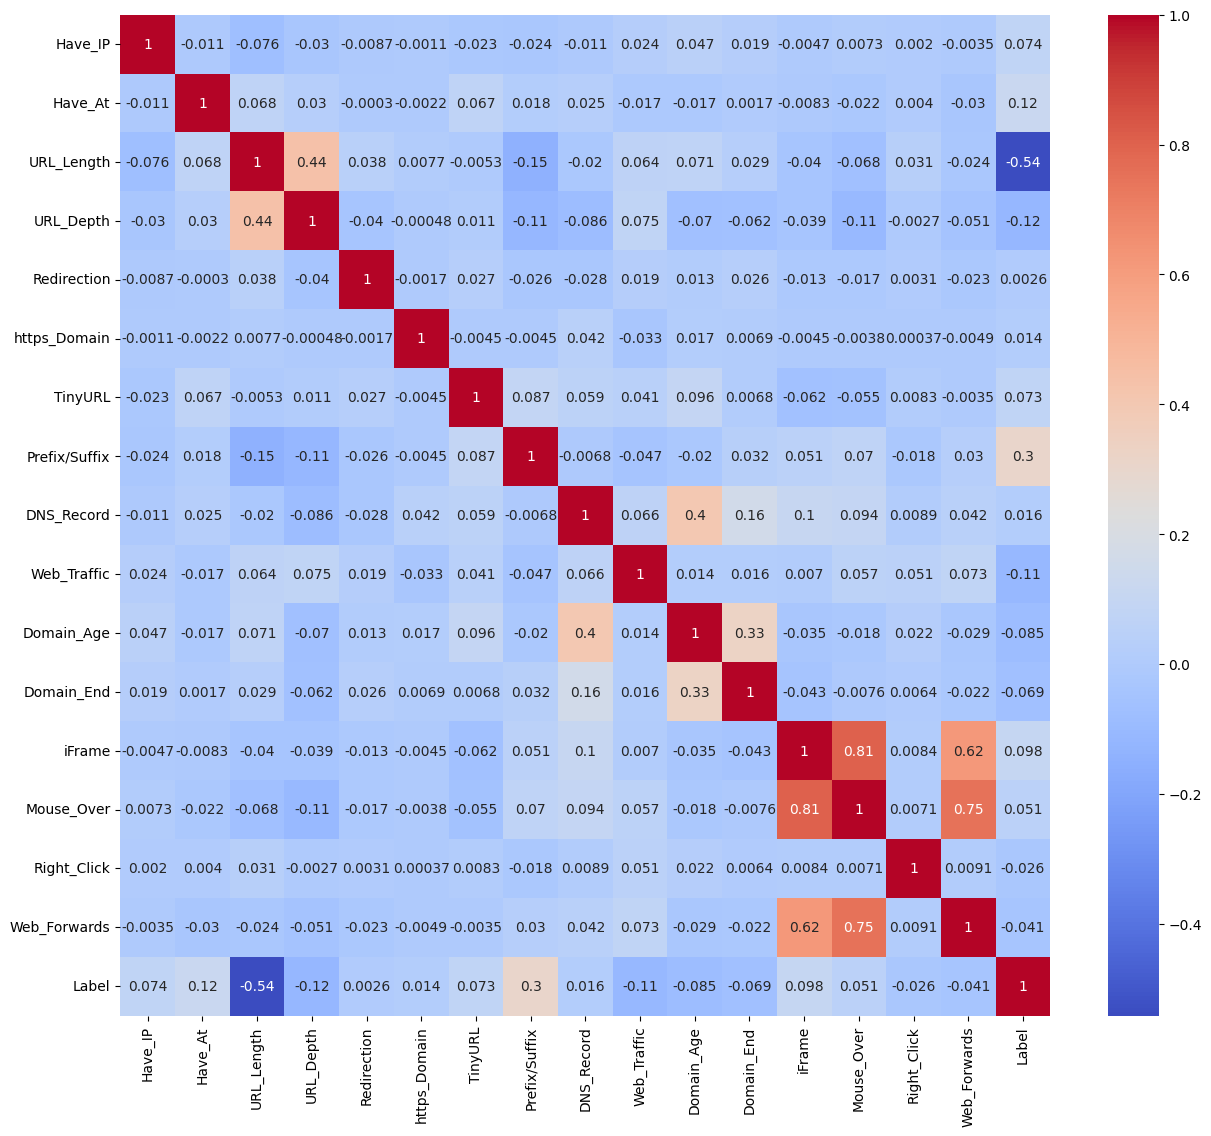

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting numeric columns
numeric_dataset = dataset.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(15,13))
sns.heatmap(numeric_dataset.corr(), annot=True, cmap='coolwarm')
plt.show()


In [ ]:
dataset.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,0.005500,0.022600,0.773400,3.072000,0.013500,0.000200,0.090300,0.093200,0.100800,0.845700,0.413700,0.8099,0.090900,0.06660,0.99930,0.105300,0.500000
std,0.073961,0.148632,0.418653,2.128631,0.115408,0.014141,0.286625,0.290727,0.301079,0.361254,0.492521,0.3924,0.287481,0.24934,0.02645,0.306955,0.500025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.500000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0000,0.000000,0.00000,1.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.00000,1.000000,1.000000


### Shuffling the Tuples

In [ ]:
# shuffling the rows
dataset=dataset.sample(frac=1).reset_index(drop=True)
dataset.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,livecentralmethodist-my.sharepoint.com,0,0,1,5,0,0,1,1,0,1,1,1,0,0,1,0,1
1,groupabamcolombiaweb.com,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1
2,zohard.com,0,0,1,8,0,0,0,0,0,1,0,0,1,0,1,0,1
3,nordichairistanbul.com,0,0,0,2,0,0,0,0,0,1,1,0,0,0,1,0,1
4,otomoto.pl,0,0,1,4,0,0,0,0,0,1,1,1,0,0,1,0,0


### Splitting the Training and Testing Data

In [ ]:
x = dataset.iloc[:,1:-1] # ignoring domain
y = dataset.iloc[:,-1]
x.shape,y.shape
print(x.columns)
print(y.name)

Index(['Have_IP', 'Have_At', 'URL_Length', 'URL_Depth', 'Redirection',
       'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'Web_Traffic',
       'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over', 'Right_Click',
       'Web_Forwards'],
      dtype='object')
Label


In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((8000, 16), (2000, 16))

### Comparison Among Various models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

decision_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
logistic_regression = LogisticRegression(random_state=42)
svm_model = SVC(kernel='linear', random_state=42)
knn_model = KNeighborsClassifier()

models = {
    'Decision Tree': decision_tree,
    'Random Forest': random_forest,
    'Logistic Regression': logistic_regression,
    'SVM': svm_model,
    'K-Nearest Neighbors': knn_model
}

results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

for name, model in models.items():
    model.fit(x_train, y_train)

    y_pred_test = model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)

    model_results = pd.DataFrame({
        'Model': [name],
        'Accuracy': [round(accuracy, 3)],
        'Precision': [round(precision, 3)],
        'Recall': [round(recall, 3)],
        'F1-Score': [round(f1, 3)]
    })

    results = pd.concat([results, model_results], ignore_index=True)

print(results)

<ipython-input-11-43592b8f1cd8>:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, model_results], ignore_index=True)


                 Model  Accuracy  Precision  Recall  F1-Score
0        Decision Tree     0.816      0.978   0.649     0.780
1        Random Forest     0.864      0.930   0.789     0.854
2  Logistic Regression     0.810      0.939   0.667     0.780
3                  SVM     0.804      0.968   0.632     0.765
4  K-Nearest Neighbors     0.849      0.894   0.794     0.841


In [ ]:
model_li=[]
accuracy_train=[]
accuracy_test=[]

def ans(model,a,b):
  model_li.append(model)
  accuracy_train.append(round(a,3))
  accuracy_test.append(round(b,3))

## Applying Decision Tree Classifier

In [ ]:
# applying decision tree
from sklearn.tree import DecisionTreeClassifier

decisionTree=DecisionTreeClassifier(max_depth=5)
decisionTree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
from sklearn.metrics import accuracy_score

# making predictions
y_pred_test=decisionTree.predict(x_test)
y_pred_train=decisionTree.predict(x_train)

accu_train = accuracy_score(y_train,y_pred_train)
accu_test = accuracy_score(y_test,y_pred_test)
print("Decision Tree: Accuracy on training Data: {:.3f}".format(accu_train))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(accu_test))

Decision Tree: Accuracy on training Data: 0.813
Decision Tree: Accuracy on test Data: 0.816


In [ ]:
ans('Decision Tree',accu_train,accu_test)

## Applying RandomForest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_test_rf = random_forest.predict(x_test)
y_pred_train_rf = random_forest.predict(x_train)

accu_train_rf = accuracy_score(y_train, y_pred_train_rf)
accu_test_rf = accuracy_score(y_test, y_pred_test_rf)

print("Random Forest: Accuracy on training Data: {:.3f}".format(accu_train_rf))
print("Random Forest: Accuracy on test Data: {:.3f}".format(accu_test_rf))


Random Forest: Accuracy on training Data: 0.867
Random Forest: Accuracy on test Data: 0.864


In [ ]:
# Storing the result
ans('Random Forest', accu_train_rf, accu_test_rf)

## Applying Multilayer Perceptron Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,100), max_iter=500, random_state=42)
mlp_classifier.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=500, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred_test_mlp = mlp_classifier.predict(x_test)
y_pred_train_mlp = mlp_classifier.predict(x_train)

accu_train_mlp = accuracy_score(y_train, y_pred_train_mlp)
accu_test_mlp = accuracy_score(y_test, y_pred_test_mlp)

print("MLP Classifier: Accuracy on training Data: {:.3f}".format(accu_train_mlp))
print("MLP Classifier: Accuracy on test Data: {:.3f}".format(accu_test_mlp))

MLP Classifier: Accuracy on training Data: 0.855
MLP Classifier: Accuracy on test Data: 0.859


In [ ]:
ans('MLP Classifier', accu_train_mlp, accu_test_mlp)

## Applying XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgboost_classifier = XGBClassifier(n_estimators=100, random_state=42)
xgboost_classifier.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred_test_xgb = xgboost_classifier.predict(x_test)
y_pred_train_xgb = xgboost_classifier.predict(x_train)

accu_train_xgb = accuracy_score(y_train, y_pred_train_xgb)
accu_test_xgb = accuracy_score(y_test, y_pred_test_xgb)

print("XGBoost Classifier: Accuracy on training Data: {:.3f}".format(accu_train_xgb))
print("XGBoost Classifier: Accuracy on test Data: {:.3f}".format(accu_test_xgb))


XGBoost Classifier: Accuracy on training Data: 0.866
XGBoost Classifier: Accuracy on test Data: 0.863


In [ ]:
ans('XGBoost Classifier', accu_train_xgb, accu_test_xgb)

## Custom Test Example

In [ ]:
pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.4/447.4 kB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 97.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/1

In [ ]:
import pandas as pd
import gradio as gr
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(x_train, y_train)

def predict_url(have_ip, have_at, url_length, url_depth, redirection,
                https_domain, tinyurl, prefix_suffix, dns_record,
                web_traffic, domain_age, domain_end, iframe,
                mouse_over, right_click, web_forwards):

    custom_input = [
        have_ip,
        have_at,
        url_length,
        url_depth,
        redirection,
        https_domain,
        tinyurl,
        prefix_suffix,
        dns_record,
        web_traffic,
        domain_age,
        domain_end,
        iframe,
        mouse_over,
        right_click,
        web_forwards
    ]

    custom_data = pd.DataFrame([custom_input], columns=[
        'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth', 'Redirection',
        'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
        'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame',
        'Mouse_Over', 'Right_Click', 'Web_Forwards'
    ])

    prediction = random_forest.predict(custom_data)

    return "The URL is Phished." if prediction[0] == 1 else "The URL is Legitimate."

iface = gr.Interface(
    fn=predict_url,
    inputs=[
        gr.Dropdown(choices=[0, 1], label="Have_IP"),
        gr.Dropdown(choices=[0, 1], label="Have_At"),
        gr.Slider(label="URL_Length", value=10, step=1),
        gr.Slider(label="URL_Depth", value=5, step=1),
        gr.Dropdown(choices=[0, 1], label="Redirection"),
        gr.Dropdown(choices=[0, 1], label="HTTPS Domain"),
        gr.Dropdown(choices=[0, 1], label="TinyURL"),
        gr.Dropdown(choices=[0, 1], label="Prefix/Suffix"),
        gr.Dropdown(choices=[0, 1], label="DNS Record"),
        gr.Dropdown(choices=[0, 1], label="Web Traffic"),
        gr.Slider(label="Domain Age", value=10, step=1),
        gr.Dropdown(choices=[0, 1], label="Domain End"),
        gr.Dropdown(choices=[0, 1], label="iFrame"),
        gr.Dropdown(choices=[0, 1], label="Mouse Over"),
        gr.Dropdown(choices=[0, 1], label="Right Click"),
        gr.Dropdown(choices=[0, 1], label="Web Forwards")
    ],
    outputs=gr.Textbox(label="Prediction Result"),
    title="URL Phishing Prediction",
    description="Input the parameters to check if the URL is Phished or Legitimate."
)

iface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://cbaf663ec31fad4840.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## Classifying the URLs

In [ ]:
def classify_all_urls(test_features, true_labels):
    results = []
    predictions = random_forest.predict(test_features)

    for i, prediction in enumerate(predictions):
        if prediction == 1:
            results.append(f"URL {i+1}: Phished")
        else:
            results.append(f"URL {i+1}: Legitimate")

    return results

classification_results = classify_all_urls(x_test, y_test)

for result in classification_results:
    print(result)

URL 1: Phished
URL 2: Legitimate
URL 3: Legitimate
URL 4: Legitimate
URL 5: Legitimate
URL 6: Legitimate
URL 7: Legitimate
URL 8: Legitimate
URL 9: Phished
URL 10: Phished
URL 11: Legitimate
URL 12: Legitimate
URL 13: Legitimate
URL 14: Legitimate
URL 15: Legitimate
URL 16: Legitimate
URL 17: Legitimate
URL 18: Phished
URL 19: Phished
URL 20: Legitimate
URL 21: Phished
URL 22: Phished
URL 23: Phished
URL 24: Phished
URL 25: Legitimate
URL 26: Legitimate
URL 27: Phished
URL 28: Legitimate
URL 29: Legitimate
URL 30: Legitimate
URL 31: Legitimate
URL 32: Legitimate
URL 33: Legitimate
URL 34: Legitimate
URL 35: Legitimate
URL 36: Legitimate
URL 37: Legitimate
URL 38: Legitimate
URL 39: Legitimate
URL 40: Legitimate
URL 41: Legitimate
URL 42: Phished
URL 43: Legitimate
URL 44: Legitimate
URL 45: Legitimate
URL 46: Phished
URL 47: Legitimate
URL 48: Phished
URL 49: Legitimate
URL 50: Legitimate
URL 51: Legitimate
URL 52: Phished
URL 53: Phished
URL 54: Legitimate
URL 55: Phished
URL 56: Phis

In [ ]:
def classify_multiple_urls_with_confidence(urls_data):
    urls_data = pd.DataFrame(urls_data)
    predictions = random_forest.predict(urls_data)
    confidences = random_forest.predict_proba(urls_data)

    results = []
    for i, (pred, conf) in enumerate(zip(predictions, confidences)):
        confidence = max(conf) * 100
        if pred == 1:
            results.append(f"URL {i + 1}: Phished with {confidence:.2f}% confidence")
        else:
            results.append(f"URL {i + 1}: Legitimate with {confidence:.2f}% confidence")

    return "\n".join(results)


## Feature Importance

<ipython-input-29-6ae65bda0064>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances_sorted, y=features_sorted, palette="viridis")


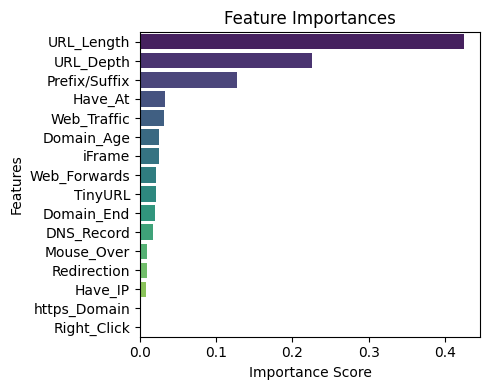

Feature Importances:
URL_Length: 0.4247
URL_Depth: 0.2262
Prefix/Suffix: 0.1269
Have_At: 0.0335
Web_Traffic: 0.0321
Domain_Age: 0.0252
iFrame: 0.0249
Web_Forwards: 0.0207
TinyURL: 0.0207
Domain_End: 0.0203
DNS_Record: 0.0170
Mouse_Over: 0.0099
Redirection: 0.0094
Have_IP: 0.0080
https_Domain: 0.0003
Right_Click: 0.0001



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def display_feature_importance():
    importances = random_forest.feature_importances_
    feature_names = x_train.columns

    # sorting the features, in the descending order
    feature_importance_dict = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

    result = "Feature Importances:\n"
    for feature, importance in feature_importance_dict:
        result += f"{feature}: {importance:.4f}\n"

    features_sorted = [x[0] for x in feature_importance_dict]
    importances_sorted = [x[1] for x in feature_importance_dict]

    plt.figure(figsize=(5, 4))
    sns.barplot(x=importances_sorted, y=features_sorted, palette="viridis")
    plt.title("Feature Importances")
    plt.xlabel("Importance Score")
    plt.ylabel("Features")
    plt.tight_layout()
    plt.show()

    return result

print(display_feature_importance())

## Logging the Results

In [ ]:
import datetime

def log_classification_results(urls_data, results):
    with open("classification_log.txt", "a") as log_file:
        log_file.write(f"Timestamp: {datetime.datetime.now()}\n")
        log_file.write(f"Input Data:\n{urls_data}\n")
        log_file.write(f"Results:\n{results}\n\n")

# Usage
urls_data = x_test[:5]  # Example input
results = classify_multiple_urls_with_confidence(urls_data)
log_classification_results(urls_data, results)

## Prediction Distribution

<ipython-input-31-6d6aeeced939>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=predictions, palette="coolwarm")
<ipython-input-31-6d6aeeced939>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=predictions, palette="coolwarm")
<ipython-input-31-6d6aeeced939>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=predictions, palette="coolwarm")
<ipython-input-31-6d6aeeced939>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=

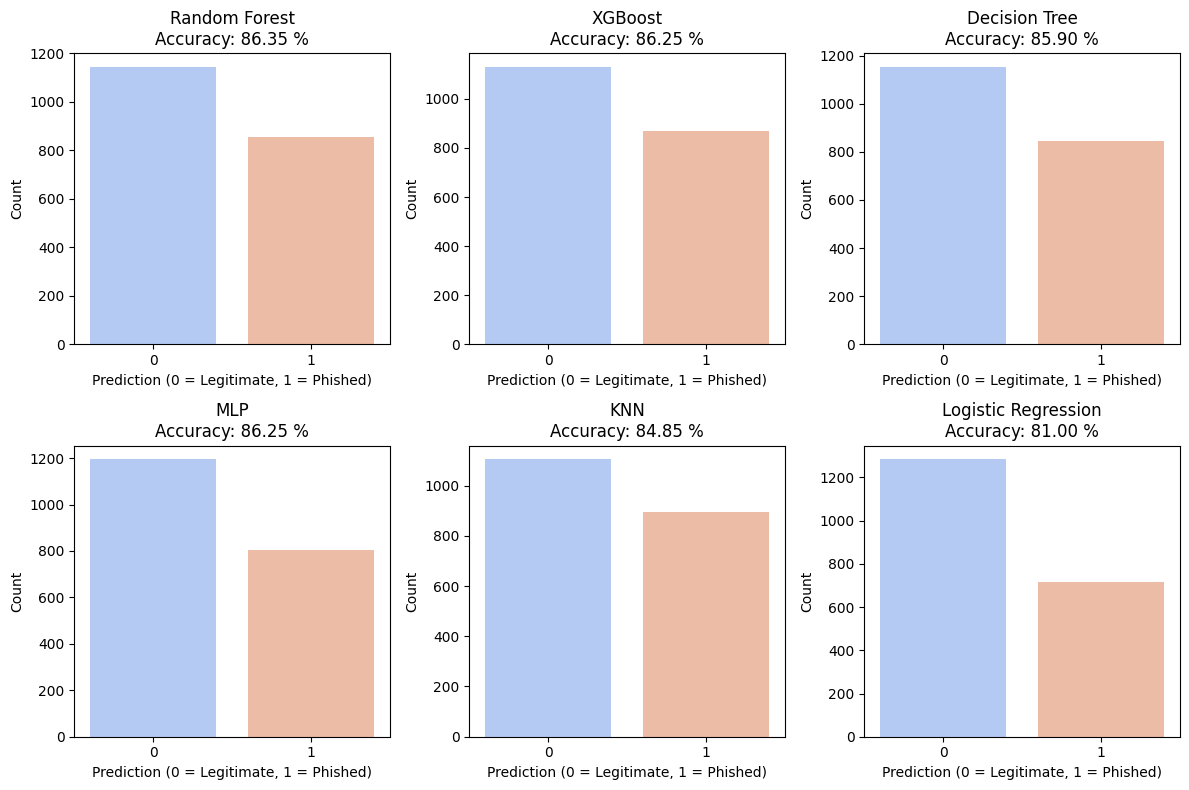

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize all models
models = {
    'Random Forest': random_forest,
    'XGBoost': XGBClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'MLP': MLPClassifier(max_iter=1000, random_state=42),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
}

# Fit all models and store predictions along with accuracy
model_predictions = {}
model_accuracies = {}
for model_name, model in models.items():
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)

    model_predictions[model_name] = predictions
    model_accuracies[model_name] = accuracy

# Plot prediction distribution for each model with accuracy
def plot_model_predictions_distribution(model_predictions, model_accuracies):
    plt.figure(figsize=(12, 8))

    for i, (model_name, predictions) in enumerate(model_predictions.items(), 1):
        plt.subplot(2, 3, i)  # Create subplots
        sns.countplot(x=predictions, palette="coolwarm")
        accuracy = model_accuracies[model_name]
        plt.title(f"{model_name}\nAccuracy: {accuracy * 100:.2f} %")
        plt.xlabel("Prediction (0 = Legitimate, 1 = Phished)")
        plt.ylabel("Count")

    plt.tight_layout()
    plt.show()

plot_model_predictions_distribution(model_predictions, model_accuracies)
